# Dataset Analysis

First, load the dataset labels.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "../../dataset/PlantVillage/dataset_labels.csv"
file_path_for_figs = '../../deliverables/progress report/figs'

labels = pd.read_csv(file_path,header=0,index_col=0);
labels_ohe = labels.join(pd.get_dummies(labels['plant']))         # one hot encoding
labels_ohe = labels_ohe.join(pd.get_dummies(labels['disease']))   # one hot encoding
labels_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20636 entries, 0 to 20635
Data columns (total 16 columns):
filename              20636 non-null object
plant                 20636 non-null object
disease               20636 non-null object
pepper                20636 non-null uint8
potato                20636 non-null uint8
tomato                20636 non-null uint8
bacterial_spot        20636 non-null uint8
early_blight          20636 non-null uint8
healthy               20636 non-null uint8
late_blight           20636 non-null uint8
leaf_mold             20636 non-null uint8
mosaic_virus          20636 non-null uint8
septoria_leaf_spot    20636 non-null uint8
spider_mites          20636 non-null uint8
target_spot           20636 non-null uint8
yellowleaf            20636 non-null uint8
dtypes: object(3), uint8(13)
memory usage: 1.5+ MB


There are 20639 items, each has 3 fields:
1. filename, which refers to the file containing the image this label applies to;
1. plant, which describes the plant type; and
1. disease, which denotes if the image is of a healthy plant or, if the image is of an unhealthy plant, what disease the plant has.

Next, start by looking at the distribution of plant and disease classes.

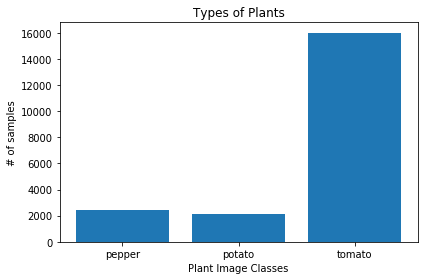

filename  disease
plant                    
pepper      2474     2474
potato      2152     2152
tomato     16010    16010

In [2]:
count_plant = labels.groupby('plant').count()
plt.bar(count_plant.index,count_plant['disease'].values)
plt.title("Types of Plants")
plt.xlabel('Plant Image Classes')
plt.ylabel('# of samples')
plt.tight_layout()
plt.savefig(file_path_for_figs + '/fig_plantID_dist.png')
plt.show()
count_plant

Of the 20639 samples, 16012, or 77.6% are of tomatoes.

2475, or 12.0% are of peppers.

2152, or 10.4% are of potatoes.

There are dramatically more tomatoes than pepper and potatoes combined.

Next, lets look at the distribution of healthy/diseased plants in each type of plant.

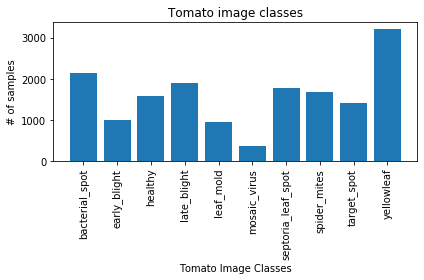

filename  plant
disease                            
bacterial_spot          2127   2127
early_blight            1000   1000
healthy                 1591   1591
late_blight             1908   1908
leaf_mold                952    952
mosaic_virus             373    373
septoria_leaf_spot      1771   1771
spider_mites            1676   1676
target_spot             1404   1404
yellowleaf              3208   3208

In [3]:
count_tomato = labels[labels.plant == 'tomato'].groupby('disease').count()
plt.bar(count_tomato.index,count_tomato['plant'].values)
plt.title("Tomato image classes")
plt.xlabel('Tomato Image Classes')
plt.ylabel('# of samples')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(file_path_for_figs + '/fig_tomatoDiseaseID_dist.png', bbox_inches='tight')
plt.show()
count_tomato

Of 16012 tomato samples, 1591, or 9.9% are healthy.

There are 9 diseases represented.  Most have about \~1500 samples (\~9.4%).

3209, or 20.0% are yellow leaf, and 373, or 2.3% are mosaic virus.

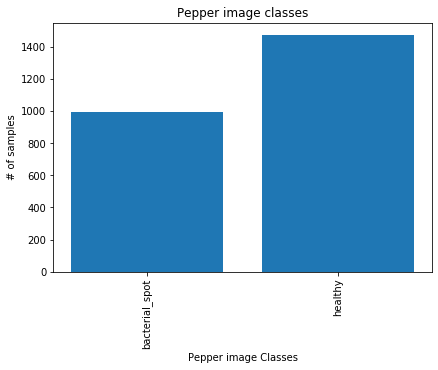

filename  plant
disease                        
bacterial_spot       997    997
healthy             1477   1477

In [4]:
count_pepper = labels[labels.plant == 'pepper'].groupby('disease').count()
plt.bar(count_pepper.index,count_pepper['plant'].values)
plt.tight_layout()
plt.title("Pepper image classes")
plt.xlabel('Pepper image Classes')
plt.ylabel('# of samples')
plt.xticks(rotation=90)
plt.savefig(file_path_for_figs + '/fig_pepperDiseaseID_dist.png', bbox_inches='tight')
plt.show()
count_pepper

Of 2475 pepper samples 1478, or 59.7%, are healthy.

997, or 40.3% are bacterial spot.

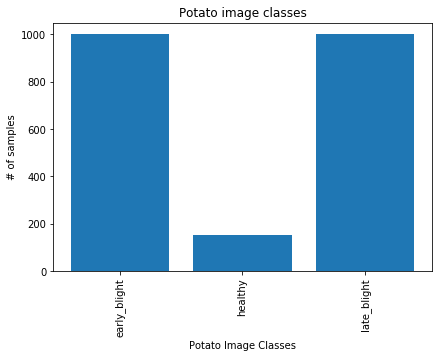

filename  plant
disease                      
early_blight      1000   1000
healthy            152    152
late_blight       1000   1000

In [5]:
count_potato = labels[labels.plant == 'potato'].groupby('disease').count()
plt.bar(count_potato.index,count_potato['plant'].values)
plt.tight_layout()
plt.title("Potato image classes")
plt.xlabel('Potato Image Classes')
plt.ylabel('# of samples')
plt.xticks(rotation=90)
plt.savefig(file_path_for_figs + '/fig_potatoDiseaseID_dist.png', bbox_inches='tight')
plt.show()
count_potato

Of 2152 potato samples, 1000, or 46.5% have early blight.

1000, or 46.5% have late blight.

Only 152, or 7.1% are healthy.

Finally, count the number of healthy samples.

In [6]:
r,_ = labels[labels.disease == "healthy"].shape
r

3220

Of a total of 20639 images, 3221, or 15.6% are of healthy images.

17418, or 84.4% are of diseased plants.